In [1]:
from analysis import BiasFinder

/home/paper3/ir-bias/venv/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline

In [10]:
def calculate_pearsonr(data, source):
    percentages = [value[0] for value in data.values()]
    wefat_scores = [value[1] for value in data.values()]
    print(percentages)
    print(wefat_scores)
    pc = sp.stats.pearsonr(percentages, wefat_scores)
    print('Pearson correlation for ' + source + ':')
    print(pc)
    print('\n')

In [4]:
def plot_career_stats(career_data_path='./career_data.tsv',
                      word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path=career_data_path,
                             word_pairs_path=word_pairs_path)
    sources = sorted(bias_finder.get_eligible_sources())
    
    options = {
        'x': 'Percentage of workers in occupation who are women',
        'y': 'Strength of association of occupation\n' \
             'word vector with female gender (WEFAT)',
        'kind': 'scatter',
        'xlim': (0, 100),
        'ylim': (-2.0, 2.0)
    }
    colors = ['blue', 'brown', 'green', 'orange', 'pink', 'red']

    df_all = pd.DataFrame([(-1, 0)], columns=[options['x'], options['y']])
    df_all = df_all.plot(**options, title='All news sources')
    
    all_stats = []
    
    for idx, source in enumerate(sources):
        data = bias_finder.calculate_wefat(source)
        all_stats.extend(data.values())
        df = pd.DataFrame(list(data.values()),
                          columns=[options['x'], options['y']])
        
        options['color'] = colors[idx]
        df.plot(**options, ax=df_all, s=40)         # aggregated plot
        df.plot(**options, s=60, title=str(source)) # individual plot
        
        calculate_pearsonr(data, str(source))
    return all_stats

Pearson correlation for Agence France-Presse:
(0.33456806203961859, 0.032510852360282769)


Pearson correlation for Associated Press Worldstream:
(0.46588120018826079, 0.0014371799607466058)


Pearson correlation for LA Times/WaPo Newswire:
(0.60642405889768147, 3.8686497540839744e-06)


Pearson correlation for New York TimesNYT: NYTSF:
(0.6812784905579562, 7.1325361183605003e-08)


Pearson correlation for ReutersREUFF: REUTE:
(0.48636932795678928, 0.00052774689544145693)


Pearson correlation for Xinua News Agency:
(0.39303501377222239, 0.026061059881229542)




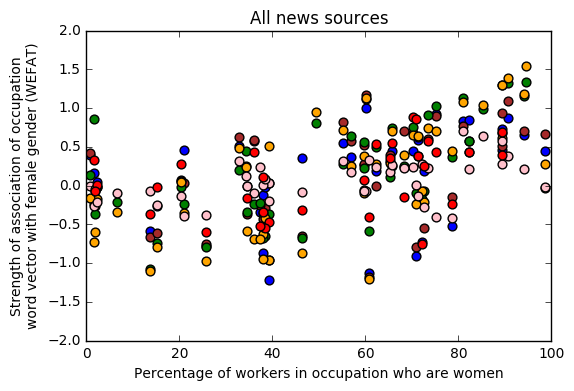

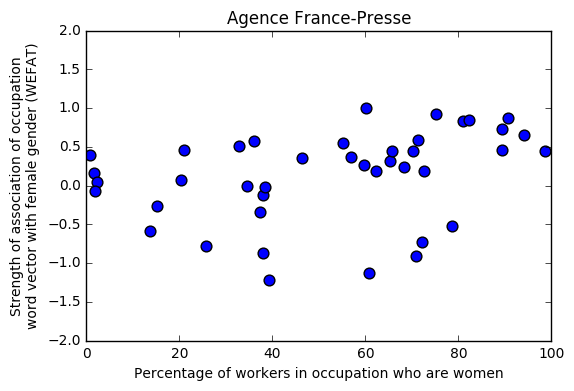

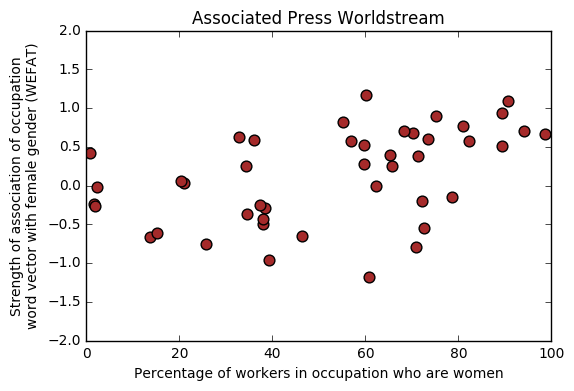

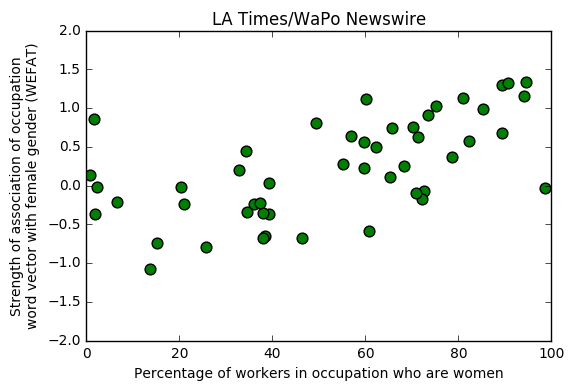

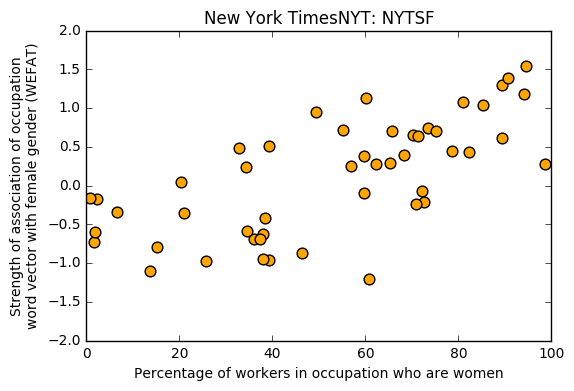

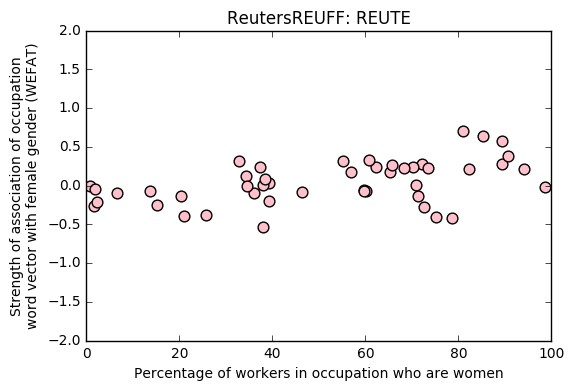

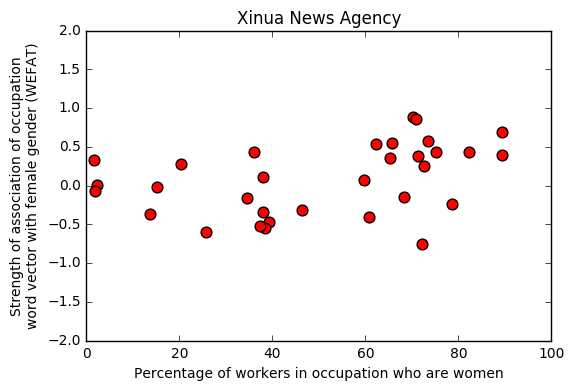

In [5]:
all_stats = plot_career_stats()

In [6]:
def plot_career_stats_golden(career_data_path='./career_data.tsv',
                             word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path=career_data_path,
                             word_pairs_path=word_pairs_path)

    x = 'Percentage of workers in occupation who are women'
    y = 'Strength of association of occupation\n' \
        'word vector with female gender (WEFAT)'
    source = 'Golden model (Google News)'
    
    data = bias_finder.calculate_wefat()
    df = pd.DataFrame(list(data.values()), columns=[x, y])

    df.plot(x=x,
            y=y,
            kind='scatter',
            color='yellow',
            s=60,
            title=source,
            xlim=(0, 100),
            ylim=(-2.0, 2.0))
    
    calculate_pearsonr(data, source)
    return data.values()

Pearson correlation for Golden model (Google News):
(0.80037433709450756, 1.4625656040198146e-11)




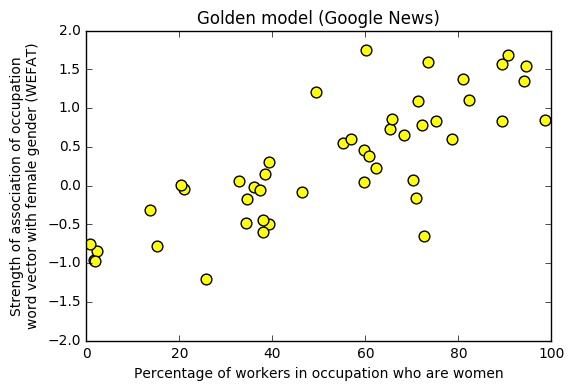

In [7]:
all_stats.extend(plot_career_stats_golden())

In [12]:
print(all_stats)
calculate_pearsonr({'all_stats': all_stats}, 'all')

[(39.2, -1.2155698448812908), (15.1, -0.26990651889329076), (90.6, 0.87333958561694502), (1.7, 0.15597272281937019), (36.1, 0.57585705629916695), (2.3, 0.050106829622783594), (55.3, 0.54880159361974334), (89.4, 0.73278461329326583), (59.7, 0.26626051797703892), (37.9, -0.87661868535331433), (72.6, 0.19229834961497735), (32.9, 0.51190888088657893), (1.9, -0.076283583852500225), (62.3, 0.19354158678357811), (57.0, 0.37357932372195551), (37.9, -0.12879991915866368), (75.1, 0.91962150622177996), (98.6, 0.44189173811943955), (0.7, 0.38710094753849533), (65.3, 0.31986174171786946), (13.6, -0.59089421680487619), (60.1, 1.0060084315224069), (72.2, -0.72972403862074886), (37.3, -0.34245735790333548), (70.3, 0.44831184437576777), (94.2, 0.6486761626507116), (80.9, 0.83607236208488245), (89.4, 0.45920045397657383), (82.3, 0.85105600531117398), (34.5, -0.0053081822159428537), (78.6, -0.52573390748602855), (46.4, 0.35759234612849572), (38.4, -0.023902283163496869), (21.0, 0.45361451240859341), (25.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()